In [1]:
import os
import numpy as np
import pandas as pd
import time
import warnings
from matplotlib import pyplot as plt

from sklearn.neural_network import MLPClassifier
import sklearn.metrics
from sklearn.metrics import balanced_accuracy_score

from sklearn.metrics import confusion_matrix
import seaborn as sns


## Loading Data

Contents of train_x.csv: arr of shape (2102, 784)
Contents of valid_x.csv: arr of shape (600, 784)


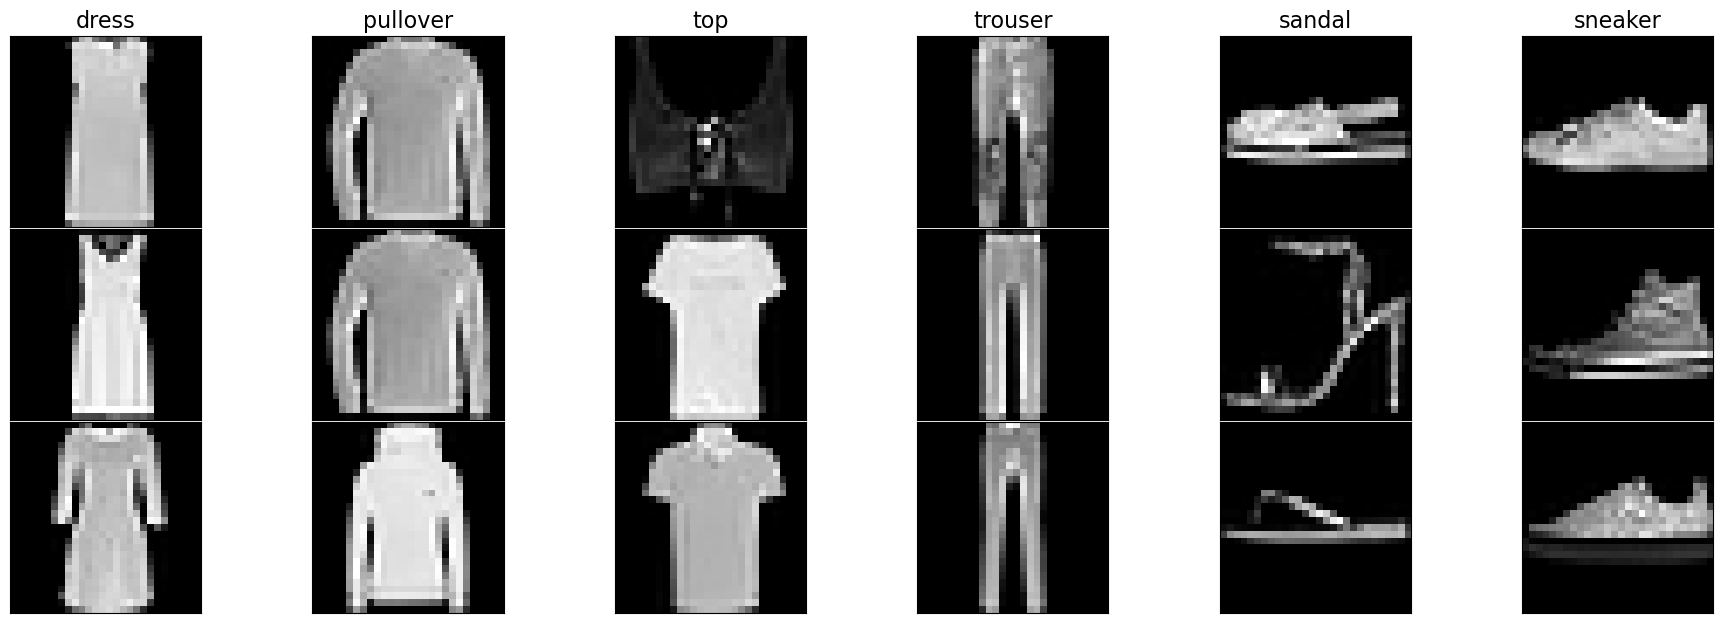

In [2]:
%run load_and_plot_data.py

In [3]:
train_y = np.array(train_y_df['class_uid'])
valid_y = np.array(valid_y_df['class_uid'])
train_x = train_x
valid_x = valid_x
train_y.shape, valid_y.shape

((2102,), (600,))

In [4]:
train_x.shape, train_x[0].dtype

((2102, 784), dtype('int64'))

In [5]:
# selecting the tops and trousers
top_x = train_x[train_y == 0]
trouser_x = train_x[train_y == 1]
top_y = train_y[train_y == 0]
trouser_y = train_y[train_y == 1]

print(top_x.shape, trouser_x.shape)
print(top_y.shape, trouser_y.shape)
# selecting the dresses
dress_x = train_x[train_y == 3]
dress_y = train_y[train_y == 3]
# selecting pullovers
pullover_x = train_x[train_y == 2]
pullover_y = train_y[train_y == 2]

(1, 784) (1, 784)
(1,) (1,)


In [6]:
# duplicated top and trouser arrays
top_x_array = np.tile(top_x, (1499, 1))
trouser_x_array = np.tile(trouser_x, (1199, 1))

top_y_array = np.tile(top_y, (1499))
trouser_y_array = np.tile(trouser_y, (1199))

print(top_x_array.shape, trouser_x_array.shape)
print(top_y_array.shape, trouser_y_array.shape)

(1499, 784) (1199, 784)
(1499,) (1199,)


In [7]:
#### duplicating tops/trousers
# duplicated top and trouser arrays
# top_x_array = np.tile(top_x, (799, 1))
# trouser_x_array = np.tile(trouser_x, (799, 1))

# top_y_array = np.tile(top_y, (799))
# trouser_y_array = np.tile(trouser_y, (799))

print(top_x_array.shape, trouser_x_array.shape)
print(top_y_array.shape, trouser_y_array.shape)
#### Randomly Duplicating
#randomly duplicating dresses
dress_dupe_in = np.random.choice(len(dress_x), size = 400, replace = True)
dress_dupe_x = dress_x[dress_dupe_in]
dress_dupe_y = dress_y[dress_dupe_in]
dress_x_array = dress_dupe_x
dress_y_array = dress_dupe_y
#randomly duplicating pullovers 
pull_dupe_in = np.random.choice(len(pullover_x), size = 700, replace = True)
#print(dress_duplicates_in)
pull_dupe_x = pullover_x[pull_dupe_in]
pull_dupe_y = pullover_y[pull_dupe_in]
#count = np.unique(dress_duplicates_x, return_counts = True)
#count
pullover_x_array = pull_dupe_x
pullover_y_array = pull_dupe_y
## Adding tops, trousers, and dresses to train_x
temp = np.vstack((train_x, top_x_array))
print(temp.shape)

temp2 = np.vstack((temp, dress_x_array))
print(temp2.shape)

temp3 = np.vstack((temp2, pullover_x_array))
print(temp3.shape)

duplicated_train_x = np.vstack((temp3, trouser_x_array))
print(duplicated_train_x.shape)


t = np.hstack((train_y, top_y_array))
t2 = np.hstack((t, dress_y_array))
t3 = np.hstack((t2, pullover_y_array))
duplicated_train_y = np.hstack((t3, trouser_y_array))
print(top_y_array.shape, dress_y_array.shape, trouser_y_array.shape, pullover_y_array.shape)

print(duplicated_train_x.shape, duplicated_train_y.shape)
valid_y = np.array(valid_y_df['class_uid'])
valid_y.shape, duplicated_train_y.shape


(1499, 784) (1199, 784)
(1499,) (1199,)
(3601, 784)
(4001, 784)
(4701, 784)
(5900, 784)
(1499,) (400,) (1199,) (700,)
(5900, 784) (5900,)


((600,), (5900,))

## Data Proprocessing with Normalization

In [8]:
### Normalizing data

scaler = sklearn.preprocessing.MinMaxScaler()
scaler.fit(duplicated_train_x)
normed_train_x = scaler.transform(duplicated_train_x)
normed_valid_x = scaler.transform(valid_x)
normed_train_x.shape

(5900, 784)

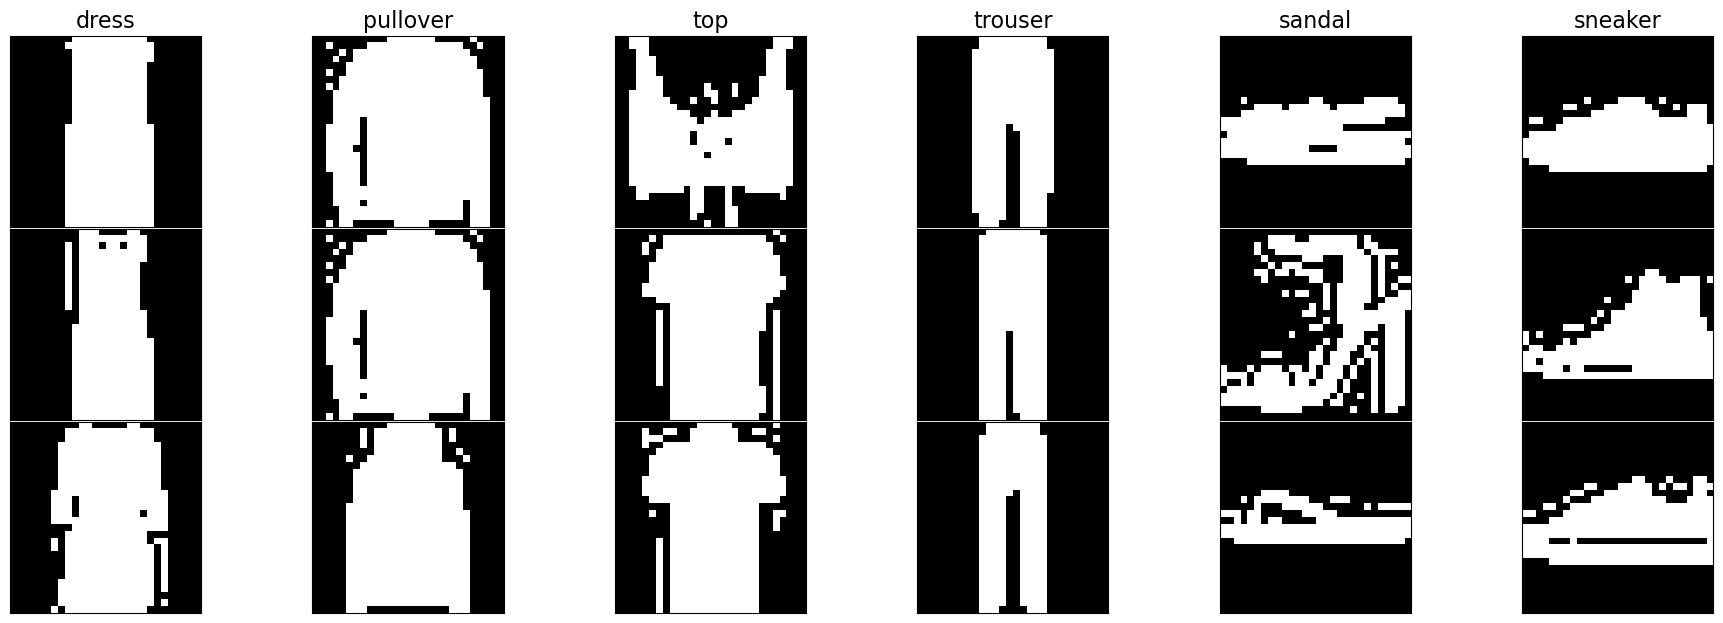

In [9]:
prng = np.random.RandomState(0)
N = 3 # num examples of each class to show
fig, axgrid = plt.subplots(N, 6, figsize=(6*3, N*2.5))

for ll, label in enumerate(['dress', 'pullover', 'top', 'trouser', 'sandal', 'sneaker']):
    match_df = valid_y_df.query("class_name == '%s'" % label)
    match_ids_N = prng.choice(match_df.index, size=N)        
    for ii, row_id in enumerate(match_ids_N):
        ax = axgrid[ii, ll]
        x_SS = normed_valid_x[row_id].reshape((28,28))
        ax.imshow(x_SS, vmin=0, vmax=255/normed_valid_x.shape[0]/normed_valid_x[0].shape[0], cmap='gray')
        ax.set_xticks([]); ax.set_yticks([]);
        if ii == 0:
            ax.set_title(label, fontsize=16)
plt.subplots_adjust(left=0.01, right=0.99, wspace=.2, hspace=.01)
#plt.tight_layout();
plt.show();

## Data Augmentation

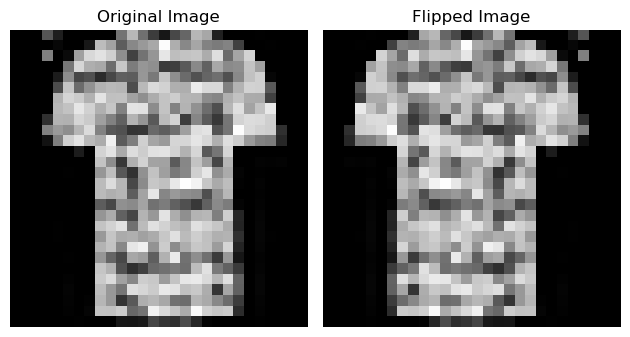

(5900, 784)

In [10]:
## Horizontal Flip
num_rows_to_flip = 200

# Generate random indices to select rows for flipping
selected_indices_tr = np.random.choice(normed_train_x.shape[0], num_rows_to_flip, replace=False)
aug_tr = np.copy(normed_train_x)

aug_tr_reshaped = aug_tr.reshape(-1, 28, 28)
aug_tr_reshaped[selected_indices_tr] = np.flip(aug_tr_reshaped[selected_indices_tr], axis=2)
aug_tr_flattened = aug_tr_reshaped.reshape(-1, 784)

if not np.isclose(np.sum(aug_tr[selected_indices_tr[0]]), np.sum(normed_train_x[selected_indices_tr[0]]), atol = 1e-8):
    warnings.warn('Flip Failed!')
    
plt.subplot(1, 2, 1)
plt.imshow(normed_train_x[selected_indices_tr[0]].reshape(28,28), cmap='gray')
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(aug_tr[selected_indices_tr[0]].reshape(28,28), cmap='gray')
plt.title('Flipped Image')
plt.axis('off')

plt.tight_layout()
plt.show()

normed_train_x = aug_tr_flattened
# [selected_indices_tr]
# # normed_train_x = np.concatenate((normed_train_x, new_tr_x),axis = 0)
# normed_train_x = new_tr_x
# # new_tr_y = duplicated_train_y[selected_indices_tr]
# # duplicated_train_y = np.concatenate((duplicated_train_y,new_tr_y), axis = 0)
# # duplicated_train_y = new_tr_y
normed_train_x.shape

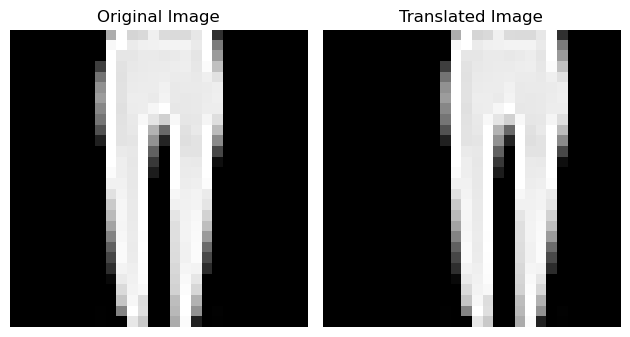

In [11]:
## Translation
translation_amount = 3  # Adjust the amount of translation
aug_tr = np.copy(normed_train_x)
num_images_to_translate = 400

selected_indices_tr = np.random.choice(normed_train_x.shape[0], num_images_to_translate, replace=False)
aug_tr = np.copy(normed_train_x)
aug_tr_reshaped = aug_tr.reshape(-1, 28, 28)
aug_tr_reshaped[selected_indices_tr] = np.roll(aug_tr_reshaped[selected_indices_tr], translation_amount, axis=2)
aug_tr_flattened = aug_tr_reshaped.reshape(-1, 784)

plt.subplot(1, 2, 1)
plt.imshow(normed_train_x[selected_indices_tr[0]].reshape(28,28), cmap='gray')
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(aug_tr[selected_indices_tr[0]].reshape(28,28), cmap='gray')
plt.title('Translated Image')
plt.axis('off')

plt.tight_layout()
plt.show()

normed_train_x = aug_tr_flattened
# duplicated_train_y = np.concatenate((duplicated_train_y,duplicated_train_y[selected_indices_tr]))
# normed_train_x = np.concatenate((aug_tr,aug_tr_flattened[selected_indices_tr]),axis =0)


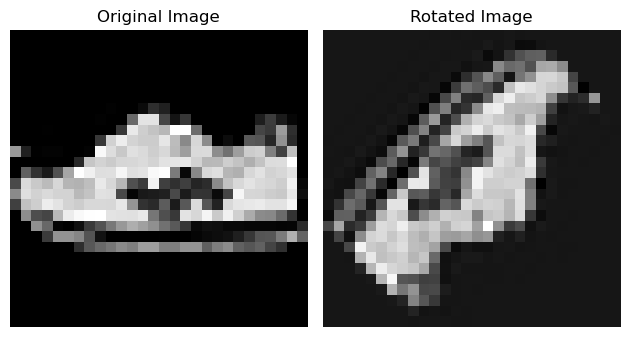

In [12]:
## Rotation
from scipy.ndimage import rotate

aug_tr = np.copy(normed_train_x)
num_rows_to_rotate = 200 # max = 2102

selected_indices = np.random.choice(aug_tr.shape[0], num_rows_to_rotate, replace=False)
rotated_array = np.copy(aug_tr)

for row in selected_indices:
    # Randomly rotate elements within the row
    random_angle = np.random.randint(30, 300)  # Choose a random angle between 0 and 360 degrees
    rotated_array[row] = rotate(rotated_array[row].reshape(28,28), random_angle, reshape=False).reshape(784,)
    


plt.subplot(1, 2, 1)
plt.imshow(normed_train_x[selected_indices[0]].reshape(28,28), cmap='gray')
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(rotated_array[selected_indices[0]].reshape(28,28), cmap='gray')
plt.title('Rotated Image')
plt.axis('off')

plt.tight_layout()
plt.show()


# duplicated_train_y = np.concatenate((duplicated_train_y,duplicated_train_y[selected_indices]))
# normed_train_x = np.concatenate((aug_tr,rotated_array[selected_indices]),axis =0)
# normed_train_x.shape

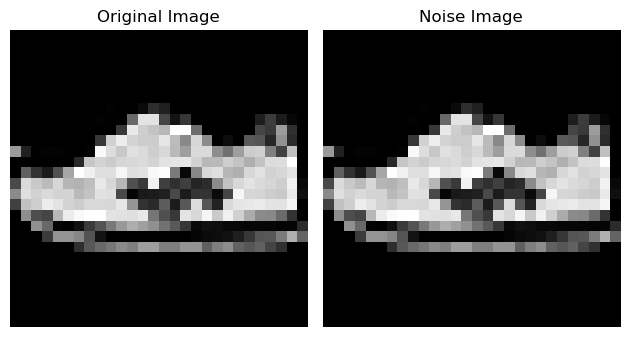

In [13]:
min_range, max_range = -0.8, 0.8
num_images_to_translate = 100  
num_points_to_translate = 50


num_images = normed_train_x.shape[0]
random_indices = np.random.choice(num_images, num_images_to_translate, replace=False)

mod_data = np.copy(normed_train_x)
for i in random_indices:
    indices = np.random.choice(mod_data.shape[1], num_points_to_translate, replace = False)
    mod_data[i] += np.random.uniform(min_range, max_range, size = mod_data.shape[1])
    mod_data[i] = np.clip(mod_data[i], 0.0, 1.0)

plt.subplot(1, 2, 1)
plt.imshow(normed_train_x[selected_indices[0]].reshape(28,28), cmap='gray')
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(mod_data[selected_indices[0]].reshape(28,28), cmap='gray')
plt.title('Noise Image')
plt.axis('off')

plt.tight_layout()
plt.show()

# normed_train_x = np.vstack((normed_train_x, mod_data[random_indices]))
# duplicated_train_y = np.hstack((duplicated_train_y, duplicated_train_y[random_indices]))
# normed_train_x.shape


In [57]:
n = 16
random_states = np.random.randint(1, 1000, size=n)

In [58]:
mlp = MLPClassifier(
            activation='relu',
            solver='lbfgs',
            batch_size = 10000,
            learning_rate='adaptive', 
            early_stopping = True,
            momentum=0.0
            )

In [59]:
random_states

array([760, 664, 906,  43, 240, 857, 939, 555, 424, 884, 218, 355, 406,
        10, 602, 307])

In [60]:
mlp_hyperparameter_grid = dict(
    hidden_layer_sizes = [(50,), (64, 50)],  
    max_iter = [25],
    random_state = random_states,
    alpha = [100, 10, 1, 0.001]
#     n_iter_no_change = [25]
)

# Hyperparameter Search

In [61]:
xall = np.vstack([normed_train_x, normed_valid_x])
yall = np.hstack([duplicated_train_y, valid_y])

### splitter
valid_indicators_L = np.hstack([
    -1 * np.ones(duplicated_train_y.size), # -1 means never include this example in any test split
    0  * np.ones(valid_y.size), #  0 means include in the first test split (we count starting at 0 in python)
    ])
my_splitter = sklearn.model_selection.PredefinedSplit(valid_indicators_L)

In [62]:
mlp_searcher = sklearn.model_selection.GridSearchCV(estimator = mlp,
                                                    param_grid = mlp_hyperparameter_grid,
                                                    scoring = 'balanced_accuracy',
                                                    cv = my_splitter,
                                                    return_train_score = True,
                                                    refit=True, verbose = 5
                                                   )

In [63]:
start_time_sec = time.time()
mlp_searcher.fit(xall, yall)
elapsed_time_sec = time.time() - start_time_sec

Fitting 1 folds for each of 128 candidates, totalling 128 fits


C:\Your\Root\Prefix\envs\cs135_env\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 1/1] END alpha=100, hidden_layer_sizes=(50,), max_iter=25, random_state=760;, score=(train=0.955, test=0.820) total time=   1.0s


C:\Your\Root\Prefix\envs\cs135_env\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 1/1] END alpha=100, hidden_layer_sizes=(50,), max_iter=25, random_state=664;, score=(train=0.959, test=0.772) total time=   1.3s


C:\Your\Root\Prefix\envs\cs135_env\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 1/1] END alpha=100, hidden_layer_sizes=(50,), max_iter=25, random_state=906;, score=(train=0.959, test=0.808) total time=   1.0s


C:\Your\Root\Prefix\envs\cs135_env\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 1/1] END alpha=100, hidden_layer_sizes=(50,), max_iter=25, random_state=43;, score=(train=0.953, test=0.730) total time=   1.0s


C:\Your\Root\Prefix\envs\cs135_env\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 1/1] END alpha=100, hidden_layer_sizes=(50,), max_iter=25, random_state=240;, score=(train=0.957, test=0.717) total time=   1.3s


C:\Your\Root\Prefix\envs\cs135_env\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 1/1] END alpha=100, hidden_layer_sizes=(50,), max_iter=25, random_state=857;, score=(train=0.958, test=0.782) total time=   1.3s


C:\Your\Root\Prefix\envs\cs135_env\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 1/1] END alpha=100, hidden_layer_sizes=(50,), max_iter=25, random_state=939;, score=(train=0.957, test=0.768) total time=   1.1s


C:\Your\Root\Prefix\envs\cs135_env\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 1/1] END alpha=100, hidden_layer_sizes=(50,), max_iter=25, random_state=555;, score=(train=0.957, test=0.832) total time=   1.1s


C:\Your\Root\Prefix\envs\cs135_env\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 1/1] END alpha=100, hidden_layer_sizes=(50,), max_iter=25, random_state=424;, score=(train=0.952, test=0.748) total time=   1.4s


C:\Your\Root\Prefix\envs\cs135_env\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 1/1] END alpha=100, hidden_layer_sizes=(50,), max_iter=25, random_state=884;, score=(train=0.948, test=0.817) total time=   1.4s


C:\Your\Root\Prefix\envs\cs135_env\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 1/1] END alpha=100, hidden_layer_sizes=(50,), max_iter=25, random_state=218;, score=(train=0.960, test=0.783) total time=   1.2s


C:\Your\Root\Prefix\envs\cs135_env\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 1/1] END alpha=100, hidden_layer_sizes=(50,), max_iter=25, random_state=355;, score=(train=0.944, test=0.797) total time=   1.4s


C:\Your\Root\Prefix\envs\cs135_env\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 1/1] END alpha=100, hidden_layer_sizes=(50,), max_iter=25, random_state=406;, score=(train=0.952, test=0.860) total time=   1.3s


C:\Your\Root\Prefix\envs\cs135_env\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 1/1] END alpha=100, hidden_layer_sizes=(50,), max_iter=25, random_state=10;, score=(train=0.955, test=0.792) total time=   1.0s


C:\Your\Root\Prefix\envs\cs135_env\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 1/1] END alpha=100, hidden_layer_sizes=(50,), max_iter=25, random_state=602;, score=(train=0.952, test=0.812) total time=   1.2s


C:\Your\Root\Prefix\envs\cs135_env\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 1/1] END alpha=100, hidden_layer_sizes=(50,), max_iter=25, random_state=307;, score=(train=0.958, test=0.745) total time=   1.2s


C:\Your\Root\Prefix\envs\cs135_env\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 1/1] END alpha=100, hidden_layer_sizes=(64, 50), max_iter=25, random_state=760;, score=(train=0.933, test=0.700) total time=   1.7s


C:\Your\Root\Prefix\envs\cs135_env\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 1/1] END alpha=100, hidden_layer_sizes=(64, 50), max_iter=25, random_state=664;, score=(train=0.935, test=0.717) total time=   1.8s


C:\Your\Root\Prefix\envs\cs135_env\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 1/1] END alpha=100, hidden_layer_sizes=(64, 50), max_iter=25, random_state=906;, score=(train=0.933, test=0.782) total time=   1.5s


C:\Your\Root\Prefix\envs\cs135_env\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 1/1] END alpha=100, hidden_layer_sizes=(64, 50), max_iter=25, random_state=43;, score=(train=0.952, test=0.712) total time=   1.8s


C:\Your\Root\Prefix\envs\cs135_env\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 1/1] END alpha=100, hidden_layer_sizes=(64, 50), max_iter=25, random_state=240;, score=(train=0.938, test=0.693) total time=   1.6s


C:\Your\Root\Prefix\envs\cs135_env\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 1/1] END alpha=100, hidden_layer_sizes=(64, 50), max_iter=25, random_state=857;, score=(train=0.945, test=0.695) total time=   1.7s


C:\Your\Root\Prefix\envs\cs135_env\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 1/1] END alpha=100, hidden_layer_sizes=(64, 50), max_iter=25, random_state=939;, score=(train=0.943, test=0.710) total time=   1.4s


C:\Your\Root\Prefix\envs\cs135_env\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 1/1] END alpha=100, hidden_layer_sizes=(64, 50), max_iter=25, random_state=555;, score=(train=0.938, test=0.768) total time=   1.5s


C:\Your\Root\Prefix\envs\cs135_env\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 1/1] END alpha=100, hidden_layer_sizes=(64, 50), max_iter=25, random_state=424;, score=(train=0.948, test=0.732) total time=   1.8s


C:\Your\Root\Prefix\envs\cs135_env\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 1/1] END alpha=100, hidden_layer_sizes=(64, 50), max_iter=25, random_state=884;, score=(train=0.947, test=0.727) total time=   1.5s


C:\Your\Root\Prefix\envs\cs135_env\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 1/1] END alpha=100, hidden_layer_sizes=(64, 50), max_iter=25, random_state=218;, score=(train=0.936, test=0.783) total time=   1.5s


C:\Your\Root\Prefix\envs\cs135_env\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 1/1] END alpha=100, hidden_layer_sizes=(64, 50), max_iter=25, random_state=355;, score=(train=0.956, test=0.780) total time=   1.7s


C:\Your\Root\Prefix\envs\cs135_env\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 1/1] END alpha=100, hidden_layer_sizes=(64, 50), max_iter=25, random_state=406;, score=(train=0.950, test=0.682) total time=   1.7s


C:\Your\Root\Prefix\envs\cs135_env\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 1/1] END alpha=100, hidden_layer_sizes=(64, 50), max_iter=25, random_state=10;, score=(train=0.948, test=0.752) total time=   1.6s


C:\Your\Root\Prefix\envs\cs135_env\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 1/1] END alpha=100, hidden_layer_sizes=(64, 50), max_iter=25, random_state=602;, score=(train=0.933, test=0.757) total time=   1.7s


C:\Your\Root\Prefix\envs\cs135_env\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 1/1] END alpha=100, hidden_layer_sizes=(64, 50), max_iter=25, random_state=307;, score=(train=0.930, test=0.690) total time=   1.4s


C:\Your\Root\Prefix\envs\cs135_env\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 1/1] END alpha=10, hidden_layer_sizes=(50,), max_iter=25, random_state=760;, score=(train=0.974, test=0.787) total time=   1.0s


C:\Your\Root\Prefix\envs\cs135_env\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 1/1] END alpha=10, hidden_layer_sizes=(50,), max_iter=25, random_state=664;, score=(train=0.976, test=0.783) total time=   1.1s


C:\Your\Root\Prefix\envs\cs135_env\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 1/1] END alpha=10, hidden_layer_sizes=(50,), max_iter=25, random_state=906;, score=(train=0.969, test=0.808) total time=   1.2s


C:\Your\Root\Prefix\envs\cs135_env\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 1/1] END alpha=10, hidden_layer_sizes=(50,), max_iter=25, random_state=43;, score=(train=0.974, test=0.742) total time=   1.0s


C:\Your\Root\Prefix\envs\cs135_env\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 1/1] END alpha=10, hidden_layer_sizes=(50,), max_iter=25, random_state=240;, score=(train=0.974, test=0.797) total time=   1.0s


C:\Your\Root\Prefix\envs\cs135_env\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 1/1] END alpha=10, hidden_layer_sizes=(50,), max_iter=25, random_state=857;, score=(train=0.975, test=0.767) total time=   1.0s


C:\Your\Root\Prefix\envs\cs135_env\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 1/1] END alpha=10, hidden_layer_sizes=(50,), max_iter=25, random_state=939;, score=(train=0.971, test=0.848) total time=   1.2s


C:\Your\Root\Prefix\envs\cs135_env\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 1/1] END alpha=10, hidden_layer_sizes=(50,), max_iter=25, random_state=555;, score=(train=0.976, test=0.740) total time=   1.0s


C:\Your\Root\Prefix\envs\cs135_env\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 1/1] END alpha=10, hidden_layer_sizes=(50,), max_iter=25, random_state=424;, score=(train=0.972, test=0.722) total time=   1.0s


C:\Your\Root\Prefix\envs\cs135_env\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 1/1] END alpha=10, hidden_layer_sizes=(50,), max_iter=25, random_state=884;, score=(train=0.976, test=0.770) total time=   1.2s


C:\Your\Root\Prefix\envs\cs135_env\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 1/1] END alpha=10, hidden_layer_sizes=(50,), max_iter=25, random_state=218;, score=(train=0.976, test=0.737) total time=   1.0s


C:\Your\Root\Prefix\envs\cs135_env\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 1/1] END alpha=10, hidden_layer_sizes=(50,), max_iter=25, random_state=355;, score=(train=0.972, test=0.832) total time=   1.1s


C:\Your\Root\Prefix\envs\cs135_env\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 1/1] END alpha=10, hidden_layer_sizes=(50,), max_iter=25, random_state=406;, score=(train=0.973, test=0.802) total time=   1.0s


C:\Your\Root\Prefix\envs\cs135_env\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 1/1] END alpha=10, hidden_layer_sizes=(50,), max_iter=25, random_state=10;, score=(train=0.974, test=0.758) total time=   1.2s


C:\Your\Root\Prefix\envs\cs135_env\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 1/1] END alpha=10, hidden_layer_sizes=(50,), max_iter=25, random_state=602;, score=(train=0.965, test=0.705) total time=   0.9s


C:\Your\Root\Prefix\envs\cs135_env\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 1/1] END alpha=10, hidden_layer_sizes=(50,), max_iter=25, random_state=307;, score=(train=0.974, test=0.745) total time=   1.0s


C:\Your\Root\Prefix\envs\cs135_env\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 1/1] END alpha=10, hidden_layer_sizes=(64, 50), max_iter=25, random_state=760;, score=(train=0.962, test=0.745) total time=   1.4s


C:\Your\Root\Prefix\envs\cs135_env\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 1/1] END alpha=10, hidden_layer_sizes=(64, 50), max_iter=25, random_state=664;, score=(train=0.955, test=0.815) total time=   1.7s


C:\Your\Root\Prefix\envs\cs135_env\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 1/1] END alpha=10, hidden_layer_sizes=(64, 50), max_iter=25, random_state=906;, score=(train=0.967, test=0.750) total time=   1.5s


C:\Your\Root\Prefix\envs\cs135_env\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 1/1] END alpha=10, hidden_layer_sizes=(64, 50), max_iter=25, random_state=43;, score=(train=0.965, test=0.763) total time=   1.5s


C:\Your\Root\Prefix\envs\cs135_env\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 1/1] END alpha=10, hidden_layer_sizes=(64, 50), max_iter=25, random_state=240;, score=(train=0.955, test=0.817) total time=   1.6s


C:\Your\Root\Prefix\envs\cs135_env\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 1/1] END alpha=10, hidden_layer_sizes=(64, 50), max_iter=25, random_state=857;, score=(train=0.963, test=0.735) total time=   1.4s


C:\Your\Root\Prefix\envs\cs135_env\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 1/1] END alpha=10, hidden_layer_sizes=(64, 50), max_iter=25, random_state=939;, score=(train=0.963, test=0.845) total time=   1.6s


C:\Your\Root\Prefix\envs\cs135_env\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 1/1] END alpha=10, hidden_layer_sizes=(64, 50), max_iter=25, random_state=555;, score=(train=0.963, test=0.873) total time=   1.5s


C:\Your\Root\Prefix\envs\cs135_env\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 1/1] END alpha=10, hidden_layer_sizes=(64, 50), max_iter=25, random_state=424;, score=(train=0.966, test=0.728) total time=   1.5s


C:\Your\Root\Prefix\envs\cs135_env\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 1/1] END alpha=10, hidden_layer_sizes=(64, 50), max_iter=25, random_state=884;, score=(train=0.961, test=0.773) total time=   1.6s


C:\Your\Root\Prefix\envs\cs135_env\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 1/1] END alpha=10, hidden_layer_sizes=(64, 50), max_iter=25, random_state=218;, score=(train=0.959, test=0.837) total time=   1.5s


C:\Your\Root\Prefix\envs\cs135_env\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 1/1] END alpha=10, hidden_layer_sizes=(64, 50), max_iter=25, random_state=355;, score=(train=0.963, test=0.782) total time=   1.4s


C:\Your\Root\Prefix\envs\cs135_env\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 1/1] END alpha=10, hidden_layer_sizes=(64, 50), max_iter=25, random_state=406;, score=(train=0.958, test=0.820) total time=   1.6s


C:\Your\Root\Prefix\envs\cs135_env\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 1/1] END alpha=10, hidden_layer_sizes=(64, 50), max_iter=25, random_state=10;, score=(train=0.967, test=0.800) total time=   1.4s


C:\Your\Root\Prefix\envs\cs135_env\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 1/1] END alpha=10, hidden_layer_sizes=(64, 50), max_iter=25, random_state=602;, score=(train=0.958, test=0.772) total time=   1.5s


C:\Your\Root\Prefix\envs\cs135_env\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 1/1] END alpha=10, hidden_layer_sizes=(64, 50), max_iter=25, random_state=307;, score=(train=0.969, test=0.817) total time=   1.6s


C:\Your\Root\Prefix\envs\cs135_env\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 1/1] END alpha=1, hidden_layer_sizes=(50,), max_iter=25, random_state=760;, score=(train=0.975, test=0.797) total time=   1.1s


C:\Your\Root\Prefix\envs\cs135_env\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 1/1] END alpha=1, hidden_layer_sizes=(50,), max_iter=25, random_state=664;, score=(train=0.976, test=0.745) total time=   1.0s


C:\Your\Root\Prefix\envs\cs135_env\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 1/1] END alpha=1, hidden_layer_sizes=(50,), max_iter=25, random_state=906;, score=(train=0.971, test=0.803) total time=   1.1s


C:\Your\Root\Prefix\envs\cs135_env\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 1/1] END alpha=1, hidden_layer_sizes=(50,), max_iter=25, random_state=43;, score=(train=0.970, test=0.802) total time=   0.9s


C:\Your\Root\Prefix\envs\cs135_env\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 1/1] END alpha=1, hidden_layer_sizes=(50,), max_iter=25, random_state=240;, score=(train=0.973, test=0.785) total time=   1.0s


C:\Your\Root\Prefix\envs\cs135_env\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 1/1] END alpha=1, hidden_layer_sizes=(50,), max_iter=25, random_state=857;, score=(train=0.974, test=0.777) total time=   1.0s


C:\Your\Root\Prefix\envs\cs135_env\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 1/1] END alpha=1, hidden_layer_sizes=(50,), max_iter=25, random_state=939;, score=(train=0.976, test=0.762) total time=   1.2s


C:\Your\Root\Prefix\envs\cs135_env\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 1/1] END alpha=1, hidden_layer_sizes=(50,), max_iter=25, random_state=555;, score=(train=0.976, test=0.778) total time=   1.0s


C:\Your\Root\Prefix\envs\cs135_env\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 1/1] END alpha=1, hidden_layer_sizes=(50,), max_iter=25, random_state=424;, score=(train=0.969, test=0.808) total time=   1.0s


C:\Your\Root\Prefix\envs\cs135_env\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 1/1] END alpha=1, hidden_layer_sizes=(50,), max_iter=25, random_state=884;, score=(train=0.976, test=0.817) total time=   1.0s


C:\Your\Root\Prefix\envs\cs135_env\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 1/1] END alpha=1, hidden_layer_sizes=(50,), max_iter=25, random_state=218;, score=(train=0.973, test=0.748) total time=   1.2s


C:\Your\Root\Prefix\envs\cs135_env\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 1/1] END alpha=1, hidden_layer_sizes=(50,), max_iter=25, random_state=355;, score=(train=0.975, test=0.792) total time=   1.0s


C:\Your\Root\Prefix\envs\cs135_env\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 1/1] END alpha=1, hidden_layer_sizes=(50,), max_iter=25, random_state=406;, score=(train=0.977, test=0.800) total time=   1.0s


C:\Your\Root\Prefix\envs\cs135_env\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 1/1] END alpha=1, hidden_layer_sizes=(50,), max_iter=25, random_state=10;, score=(train=0.973, test=0.832) total time=   1.0s


C:\Your\Root\Prefix\envs\cs135_env\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 1/1] END alpha=1, hidden_layer_sizes=(50,), max_iter=25, random_state=602;, score=(train=0.963, test=0.863) total time=   1.2s


C:\Your\Root\Prefix\envs\cs135_env\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 1/1] END alpha=1, hidden_layer_sizes=(50,), max_iter=25, random_state=307;, score=(train=0.975, test=0.758) total time=   1.1s


C:\Your\Root\Prefix\envs\cs135_env\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 1/1] END alpha=1, hidden_layer_sizes=(64, 50), max_iter=25, random_state=760;, score=(train=0.959, test=0.760) total time=   1.4s


C:\Your\Root\Prefix\envs\cs135_env\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 1/1] END alpha=1, hidden_layer_sizes=(64, 50), max_iter=25, random_state=664;, score=(train=0.959, test=0.793) total time=   1.7s


C:\Your\Root\Prefix\envs\cs135_env\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 1/1] END alpha=1, hidden_layer_sizes=(64, 50), max_iter=25, random_state=906;, score=(train=0.964, test=0.738) total time=   1.4s


C:\Your\Root\Prefix\envs\cs135_env\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 1/1] END alpha=1, hidden_layer_sizes=(64, 50), max_iter=25, random_state=43;, score=(train=0.961, test=0.768) total time=   1.5s


C:\Your\Root\Prefix\envs\cs135_env\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 1/1] END alpha=1, hidden_layer_sizes=(64, 50), max_iter=25, random_state=240;, score=(train=0.954, test=0.787) total time=   1.6s


C:\Your\Root\Prefix\envs\cs135_env\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 1/1] END alpha=1, hidden_layer_sizes=(64, 50), max_iter=25, random_state=857;, score=(train=0.960, test=0.790) total time=   1.4s


C:\Your\Root\Prefix\envs\cs135_env\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 1/1] END alpha=1, hidden_layer_sizes=(64, 50), max_iter=25, random_state=939;, score=(train=0.964, test=0.793) total time=   1.6s


C:\Your\Root\Prefix\envs\cs135_env\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 1/1] END alpha=1, hidden_layer_sizes=(64, 50), max_iter=25, random_state=555;, score=(train=0.964, test=0.900) total time=   1.4s


C:\Your\Root\Prefix\envs\cs135_env\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 1/1] END alpha=1, hidden_layer_sizes=(64, 50), max_iter=25, random_state=424;, score=(train=0.962, test=0.758) total time=   1.4s


C:\Your\Root\Prefix\envs\cs135_env\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 1/1] END alpha=1, hidden_layer_sizes=(64, 50), max_iter=25, random_state=884;, score=(train=0.962, test=0.770) total time=   1.6s


C:\Your\Root\Prefix\envs\cs135_env\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 1/1] END alpha=1, hidden_layer_sizes=(64, 50), max_iter=25, random_state=218;, score=(train=0.956, test=0.852) total time=   1.5s


C:\Your\Root\Prefix\envs\cs135_env\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 1/1] END alpha=1, hidden_layer_sizes=(64, 50), max_iter=25, random_state=355;, score=(train=0.960, test=0.830) total time=   1.4s


C:\Your\Root\Prefix\envs\cs135_env\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 1/1] END alpha=1, hidden_layer_sizes=(64, 50), max_iter=25, random_state=406;, score=(train=0.955, test=0.853) total time=   1.6s


C:\Your\Root\Prefix\envs\cs135_env\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 1/1] END alpha=1, hidden_layer_sizes=(64, 50), max_iter=25, random_state=10;, score=(train=0.966, test=0.777) total time=   1.4s


C:\Your\Root\Prefix\envs\cs135_env\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 1/1] END alpha=1, hidden_layer_sizes=(64, 50), max_iter=25, random_state=602;, score=(train=0.957, test=0.780) total time=   1.5s


C:\Your\Root\Prefix\envs\cs135_env\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 1/1] END alpha=1, hidden_layer_sizes=(64, 50), max_iter=25, random_state=307;, score=(train=0.969, test=0.790) total time=   1.6s


C:\Your\Root\Prefix\envs\cs135_env\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 1/1] END alpha=0.001, hidden_layer_sizes=(50,), max_iter=25, random_state=760;, score=(train=0.974, test=0.823) total time=   1.0s


C:\Your\Root\Prefix\envs\cs135_env\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 1/1] END alpha=0.001, hidden_layer_sizes=(50,), max_iter=25, random_state=664;, score=(train=0.974, test=0.735) total time=   1.0s


C:\Your\Root\Prefix\envs\cs135_env\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 1/1] END alpha=0.001, hidden_layer_sizes=(50,), max_iter=25, random_state=906;, score=(train=0.969, test=0.787) total time=   1.2s


C:\Your\Root\Prefix\envs\cs135_env\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 1/1] END alpha=0.001, hidden_layer_sizes=(50,), max_iter=25, random_state=43;, score=(train=0.975, test=0.778) total time=   1.0s


C:\Your\Root\Prefix\envs\cs135_env\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 1/1] END alpha=0.001, hidden_layer_sizes=(50,), max_iter=25, random_state=240;, score=(train=0.973, test=0.780) total time=   1.1s


C:\Your\Root\Prefix\envs\cs135_env\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 1/1] END alpha=0.001, hidden_layer_sizes=(50,), max_iter=25, random_state=857;, score=(train=0.974, test=0.808) total time=   1.0s


C:\Your\Root\Prefix\envs\cs135_env\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 1/1] END alpha=0.001, hidden_layer_sizes=(50,), max_iter=25, random_state=939;, score=(train=0.973, test=0.818) total time=   1.1s


C:\Your\Root\Prefix\envs\cs135_env\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 1/1] END alpha=0.001, hidden_layer_sizes=(50,), max_iter=25, random_state=555;, score=(train=0.972, test=0.847) total time=   1.2s


C:\Your\Root\Prefix\envs\cs135_env\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 1/1] END alpha=0.001, hidden_layer_sizes=(50,), max_iter=25, random_state=424;, score=(train=0.966, test=0.813) total time=   1.0s


C:\Your\Root\Prefix\envs\cs135_env\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 1/1] END alpha=0.001, hidden_layer_sizes=(50,), max_iter=25, random_state=884;, score=(train=0.976, test=0.810) total time=   1.0s


C:\Your\Root\Prefix\envs\cs135_env\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 1/1] END alpha=0.001, hidden_layer_sizes=(50,), max_iter=25, random_state=218;, score=(train=0.975, test=0.742) total time=   1.2s


C:\Your\Root\Prefix\envs\cs135_env\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 1/1] END alpha=0.001, hidden_layer_sizes=(50,), max_iter=25, random_state=355;, score=(train=0.973, test=0.783) total time=   1.1s


C:\Your\Root\Prefix\envs\cs135_env\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 1/1] END alpha=0.001, hidden_layer_sizes=(50,), max_iter=25, random_state=406;, score=(train=0.978, test=0.802) total time=   1.1s


C:\Your\Root\Prefix\envs\cs135_env\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 1/1] END alpha=0.001, hidden_layer_sizes=(50,), max_iter=25, random_state=10;, score=(train=0.966, test=0.860) total time=   1.0s


C:\Your\Root\Prefix\envs\cs135_env\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 1/1] END alpha=0.001, hidden_layer_sizes=(50,), max_iter=25, random_state=602;, score=(train=0.969, test=0.730) total time=   1.2s


C:\Your\Root\Prefix\envs\cs135_env\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 1/1] END alpha=0.001, hidden_layer_sizes=(50,), max_iter=25, random_state=307;, score=(train=0.974, test=0.770) total time=   1.0s


C:\Your\Root\Prefix\envs\cs135_env\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 1/1] END alpha=0.001, hidden_layer_sizes=(64, 50), max_iter=25, random_state=760;, score=(train=0.959, test=0.765) total time=   1.4s


C:\Your\Root\Prefix\envs\cs135_env\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 1/1] END alpha=0.001, hidden_layer_sizes=(64, 50), max_iter=25, random_state=664;, score=(train=0.954, test=0.855) total time=   1.9s


C:\Your\Root\Prefix\envs\cs135_env\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 1/1] END alpha=0.001, hidden_layer_sizes=(64, 50), max_iter=25, random_state=906;, score=(train=0.963, test=0.747) total time=   2.6s


C:\Your\Root\Prefix\envs\cs135_env\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 1/1] END alpha=0.001, hidden_layer_sizes=(64, 50), max_iter=25, random_state=43;, score=(train=0.964, test=0.770) total time=   1.8s


C:\Your\Root\Prefix\envs\cs135_env\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 1/1] END alpha=0.001, hidden_layer_sizes=(64, 50), max_iter=25, random_state=240;, score=(train=0.949, test=0.803) total time=   1.8s


C:\Your\Root\Prefix\envs\cs135_env\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 1/1] END alpha=0.001, hidden_layer_sizes=(64, 50), max_iter=25, random_state=857;, score=(train=0.961, test=0.793) total time=   1.6s


C:\Your\Root\Prefix\envs\cs135_env\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 1/1] END alpha=0.001, hidden_layer_sizes=(64, 50), max_iter=25, random_state=939;, score=(train=0.966, test=0.837) total time=   1.5s


C:\Your\Root\Prefix\envs\cs135_env\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 1/1] END alpha=0.001, hidden_layer_sizes=(64, 50), max_iter=25, random_state=555;, score=(train=0.965, test=0.828) total time=   1.9s


C:\Your\Root\Prefix\envs\cs135_env\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 1/1] END alpha=0.001, hidden_layer_sizes=(64, 50), max_iter=25, random_state=424;, score=(train=0.967, test=0.767) total time=   1.8s


C:\Your\Root\Prefix\envs\cs135_env\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 1/1] END alpha=0.001, hidden_layer_sizes=(64, 50), max_iter=25, random_state=884;, score=(train=0.961, test=0.777) total time=   1.6s


C:\Your\Root\Prefix\envs\cs135_env\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 1/1] END alpha=0.001, hidden_layer_sizes=(64, 50), max_iter=25, random_state=218;, score=(train=0.953, test=0.875) total time=   1.7s


C:\Your\Root\Prefix\envs\cs135_env\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 1/1] END alpha=0.001, hidden_layer_sizes=(64, 50), max_iter=25, random_state=355;, score=(train=0.961, test=0.825) total time=   1.5s


C:\Your\Root\Prefix\envs\cs135_env\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 1/1] END alpha=0.001, hidden_layer_sizes=(64, 50), max_iter=25, random_state=406;, score=(train=0.958, test=0.825) total time=   1.6s


C:\Your\Root\Prefix\envs\cs135_env\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 1/1] END alpha=0.001, hidden_layer_sizes=(64, 50), max_iter=25, random_state=10;, score=(train=0.962, test=0.840) total time=   1.6s


C:\Your\Root\Prefix\envs\cs135_env\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 1/1] END alpha=0.001, hidden_layer_sizes=(64, 50), max_iter=25, random_state=602;, score=(train=0.954, test=0.812) total time=   1.5s


C:\Your\Root\Prefix\envs\cs135_env\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 1/1] END alpha=0.001, hidden_layer_sizes=(64, 50), max_iter=25, random_state=307;, score=(train=0.968, test=0.828) total time=   1.7s


C:\Your\Root\Prefix\envs\cs135_env\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


In [66]:
mlp_searcher_result = pd.DataFrame(mlp_searcher.cv_results_).copy()
mlp_searcher_result[mlp_searcher_result['param_alpha'] == 1]

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,param_hidden_layer_sizes,param_max_iter,param_random_state,params,split0_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,mean_train_score,std_train_score
64,1.163278,0.0,0.005028,0.0,1,"(50,)",25,760,"{'alpha': 1, 'hidden_layer_sizes': (50,), 'max...",0.796667,0.796667,0.0,48,0.975417,0.975417,0.0
65,1.094026,0.0,0.004043,0.0,1,"(50,)",25,664,"{'alpha': 1, 'hidden_layer_sizes': (50,), 'max...",0.745000,0.745000,0.0,102,0.976250,0.976250,0.0
66,1.240860,0.0,0.004005,0.0,1,"(50,)",25,906,"{'alpha': 1, 'hidden_layer_sizes': (50,), 'max...",0.803333,0.803333,0.0,41,0.971458,0.971458,0.0
67,1.037061,0.0,0.004411,0.0,1,"(50,)",25,43,"{'alpha': 1, 'hidden_layer_sizes': (50,), 'max...",0.801667,0.801667,0.0,45,0.970417,0.970417,0.0
68,1.140425,0.0,0.004033,0.0,1,"(50,)",25,240,"{'alpha': 1, 'hidden_layer_sizes': (50,), 'max...",0.785000,0.785000,0.0,61,0.972917,0.972917,0.0
69,1.070869,0.0,0.005116,0.0,1,"(50,)",25,857,"{'alpha': 1, 'hidden_layer_sizes': (50,), 'max...",0.776667,0.776667,0.0,74,0.974375,0.974375,0.0
70,1.274655,0.0,0.003998,0.0,1,"(50,)",25,939,"{'alpha': 1, 'hidden_layer_sizes': (50,), 'max...",0.761667,0.761667,0.0,91,0.975833,0.975833,0.0
71,1.063654,0.0,0.006090,0.0,1,"(50,)",25,555,"{'alpha': 1, 'hidden_layer_sizes': (50,), 'max...",0.778333,0.778333,0.0,72,0.975625,0.975625,0.0
72,1.054029,0.0,0.004006,0.0,1,"(50,)",25,424,"{'alpha': 1, 'hidden_layer_sizes': (50,), 'max...",0.808333,0.808333,0.0,37,0.969375,0.969375,0.0
73,1.090028,0.0,0.004000,0.0,1,"(50,)",25,884,"{'alpha': 1, 'hidden_layer_sizes': (50,), 'max...",0.816667,0.816667,0.0,28,0.976458,0.976458,0.0


In [ ]:
# [CV 1/1] END alpha=1, hidden_layer_sizes=(50,), max_iter=50, random_state=676;, score=(train=0.894, test=0.825) total time=   2.4s


In [65]:
best_param = mlp_searcher.best_params_
# manual_param = {'activation': 'relu',
#  'alpha': 1e-07,
#  'hidden_layer_sizes': (50,),
#  'max_iter': 250,
#  'n_iter_no_change': 25,
#  'random_state': 610}
best_param

{'alpha': 1,
 'hidden_layer_sizes': (64, 50),
 'max_iter': 25,
 'random_state': 555}

In [ ]:
# rotation and noise
# {'alpha': 1, 'hidden_layer_sizes': (50,), 'max_iter': 50, 'random_state': 676}
# 0.824

In [ ]:
# Richard has done
# horizontal flip + translation
# 

In [67]:
best_mlp = mlp 
best_mlp.set_params(**best_param)
best_mlp.fit(normed_train_x, duplicated_train_y)

C:\Your\Root\Prefix\envs\cs135_env\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


MLPClassifier(alpha=1, batch_size=10000, early_stopping=True,
              hidden_layer_sizes=(64, 50), learning_rate='adaptive',
              max_iter=25, momentum=0.0, random_state=555, solver='lbfgs')

In [68]:
pred_y = best_mlp.predict(normed_valid_x)
best_mlp_BAcc = sklearn.metrics.balanced_accuracy_score(valid_y, pred_y)
best_mlp_BAcc

0.8999999999999999

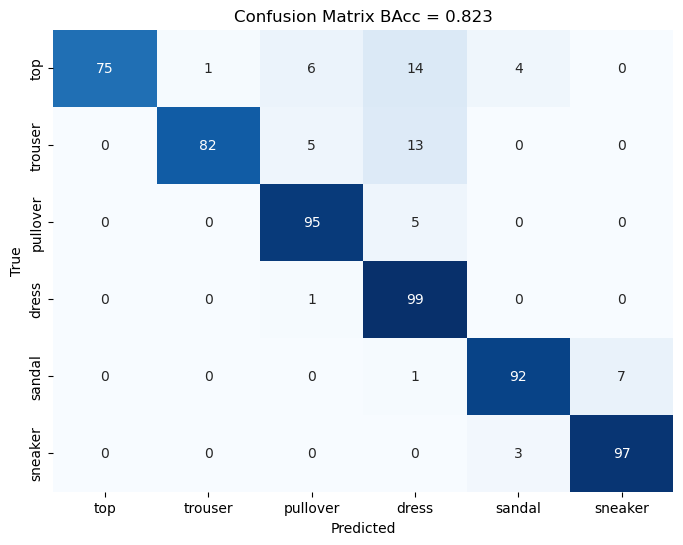

In [69]:
conf_matrix = confusion_matrix(valid_y, pred_y)

# Display the confusion matrix using a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['top', 'trouser', 'pullover', 'dress', 'sandal', 'sneaker'],
            yticklabels=['top', 'trouser', 'pullover', 'dress', 'sandal', 'sneaker'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix BAcc = 0.823')
plt.show()

leaderboard

In [70]:
# Load the dataset of interest
datadir = os.path.abspath('data_fashion')
x_NF = np.loadtxt(os.path.join(datadir, 'x_test.csv'), 
                  delimiter=',', 
                  skiprows=1)

N = x_NF.shape[0]

In [71]:
normed_test_x = scaler.transform(x_NF)

In [72]:
yhat_pred_num = best_mlp.predict(normed_test_x)

In [73]:
yhat_pred_num

array([0, 1, 2, 2, 3, 2, 5, 0, 3, 5, 3, 2, 3, 5, 7, 3, 7, 7, 7, 1, 3, 3,
       2, 2, 2, 0, 3, 3, 2, 3, 2, 2, 3, 0, 3, 5, 3, 1, 0, 5, 2, 7, 3, 5,
       7, 3, 1, 1, 2, 3, 3, 2, 2, 3, 7, 7, 3, 3, 2, 2, 3, 2, 7, 5, 5, 3,
       2, 7, 5, 3, 2, 7, 3, 0, 5, 7, 0, 5, 0, 3, 1, 7, 3, 3, 3, 3, 2, 2,
       3, 0, 1, 3, 3, 3, 1, 3, 3, 3, 5, 7, 7, 3, 3, 0, 7, 2, 2, 3, 2, 5,
       7, 1, 3, 1, 5, 5, 0, 7, 1, 5, 0, 2, 0, 0, 2, 5, 5, 2, 1, 3, 7, 1,
       5, 0, 2, 5, 7, 7, 3, 2, 5, 7, 1, 5, 2, 7, 0, 2, 1, 5, 7, 7, 0, 2,
       5, 3, 3, 1, 2, 3, 3, 2, 2, 2, 3, 2, 2, 7, 2, 5, 5, 7, 2, 3, 1, 2,
       2, 2, 1, 1, 3, 3, 1, 7, 0, 5, 2, 0, 7, 7, 7, 7, 1, 7, 7, 0, 2, 2,
       2, 5, 3, 5, 7, 7, 1, 2, 7, 3, 3, 3, 5, 5, 0, 2, 0, 3, 5, 5, 2, 2,
       0, 7, 3, 2, 7, 5, 2, 0, 2, 2, 7, 2, 3, 7, 5, 1, 2, 5, 5, 3, 3, 7,
       3, 5, 0, 0, 2, 3, 5, 7, 3, 5, 0, 0, 5, 7, 7, 5, 5, 0, 0, 1, 2, 2,
       3, 1, 2, 5, 3, 2, 7, 3, 2, 0, 7, 7, 5, 1, 2, 3, 0, 5, 5, 5, 3, 2,
       7, 1, 5, 2, 5, 5, 3, 7, 7, 3, 7, 3, 1, 7, 2,

In [75]:
yhat_pred = yhat_pred_num.astype(str)
yhat_pred

array(['0', '1', '2', '2', '3', '2', '5', '0', '3', '5', '3', '2', '3',
       '5', '7', '3', '7', '7', '7', '1', '3', '3', '2', '2', '2', '0',
       '3', '3', '2', '3', '2', '2', '3', '0', '3', '5', '3', '1', '0',
       '5', '2', '7', '3', '5', '7', '3', '1', '1', '2', '3', '3', '2',
       '2', '3', '7', '7', '3', '3', '2', '2', '3', '2', '7', '5', '5',
       '3', '2', '7', '5', '3', '2', '7', '3', '0', '5', '7', '0', '5',
       '0', '3', '1', '7', '3', '3', '3', '3', '2', '2', '3', '0', '1',
       '3', '3', '3', '1', '3', '3', '3', '5', '7', '7', '3', '3', '0',
       '7', '2', '2', '3', '2', '5', '7', '1', '3', '1', '5', '5', '0',
       '7', '1', '5', '0', '2', '0', '0', '2', '5', '5', '2', '1', '3',
       '7', '1', '5', '0', '2', '5', '7', '7', '3', '2', '5', '7', '1',
       '5', '2', '7', '0', '2', '1', '5', '7', '7', '0', '2', '5', '3',
       '3', '1', '2', '3', '3', '2', '2', '2', '3', '2', '2', '7', '2',
       '5', '5', '7', '2', '3', '1', '2', '2', '2', '1', '1', '3

In [54]:
names = ['dress', 'pullover', 'top', 'trouser', 'sandal', 'sneaker']

In [55]:
yhat_pred[yhat_pred_num == 3] = names[0] # dress
yhat_pred[yhat_pred_num == 2] = names[1] # pullover
yhat_pred[yhat_pred_num == 0] = names[2] # top
yhat_pred[yhat_pred_num == 1] = names[3] # trouser
yhat_pred[yhat_pred_num == 5] = names[4] # sandal
yhat_pred[yhat_pred_num == 7] = names[5] # sneaker

yhat_pred

array(['top', 'trouser', 'pullover', 'pullover', 'pullover', 'pullover',
       'sandal', 'top', 'dress', 'sandal', 'dress', 'pullover', 'dress',
       'sandal', 'sneaker', 'dress', 'sneaker', 'sneaker', 'sneaker',
       'dress', 'dress', 'dress', 'pullover', 'top', 'pullover', 'top',
       'dress', 'dress', 'pullover', 'dress', 'pullover', 'pullover',
       'dress', 'top', 'dress', 'sandal', 'dress', 'trouser', 'dress',
       'sandal', 'pullover', 'sneaker', 'dress', 'sandal', 'sneaker',
       'dress', 'trouser', 'trouser', 'pullover', 'dress', 'dress',
       'pullover', 'pullover', 'pullover', 'sneaker', 'sneaker', 'dress',
       'dress', 'pullover', 'pullover', 'dress', 'pullover', 'sneaker',
       'sandal', 'sandal', 'dress', 'pullover', 'sneaker', 'sandal',
       'dress', 'pullover', 'sneaker', 'dress', 'top', 'sandal',
       'sneaker', 'top', 'sandal', 'top', 'dress', 'trouser', 'sneaker',
       'dress', 'dress', 'dress', 'dress', 'pullover', 'pullover',
       'dress

In [56]:
np.savetxt('yhat_test_l.txt', yhat_pred, delimiter='\n', fmt='%s')